In [1]:
### Support Vector Machine ###
# https://scikit-learn.org/stable/modules/svm.html

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [8]:
# Preparing the data:
X = [[0,0], [1,1]]
y = [0,1]

In [9]:
# Model fitting:
clf = svm.SVC(gamma="auto")
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Model prediction:
clf.predict([[2.,2.]])

array([1])

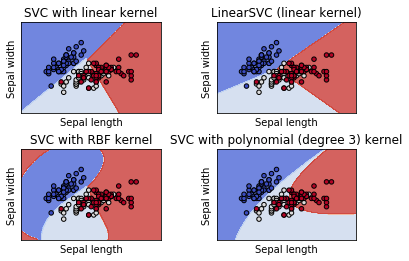

In [15]:
### Plot different classifiers (kernels) for the SVM ###
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

# Create a mesh of points to plot in the parameters x, y and h:
## h: stepsize for meshgrid, optional
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Plot the decision boundaries for a classifier:
def plot_contours(ax, clf, xx, yy, **params):    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Import the data:
from sklearn import datasets
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset:
X = iris.data[:, :2]
y = iris.target

# Create an instance of SVM and fit out data.
# Do not scale the data since the plot is wanted for the support vectors:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# Title for the plots:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()